Data: Fiorini, S. (2016). gene expression cancer RNA-Seq [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5R88H.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
import time
import seaborn as sns

In [17]:
data = pd.read_csv('data/data.csv')
label = pd.read_csv('data/labels.csv')
data=data.drop('Unnamed: 0',axis=1)
label=label.drop('Unnamed: 0',axis=1)

In [18]:
# Merge features and targets into a single DataFrame
df = pd.concat([data, label], axis=1)

In [19]:
# Check the structure of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20532 entries, gene_0 to Class
dtypes: float64(20531), object(1)
memory usage: 125.5+ MB
None


In [20]:
# Dataset Shape and Data Types
print("Dataset Shape:", df.shape)

Dataset Shape: (801, 20532)


In [21]:
# Initialize empty Series for each statistic
feature_means = pd.Series(dtype=float)
feature_maxs = pd.Series(dtype=float)
feature_mins = pd.Series(dtype=float)

# Calculate statistics with error handling
for col in df.columns:
    try:
        # Attempt to calculate statistics for numeric columns
        feature_means[col] = df[col].mean()
        feature_maxs[col] = df[col].max()
        feature_mins[col] = df[col].min()
    except TypeError:
        # Skip non-numeric columns
        print(f"Skipping column '{col}' due to non-numeric data type")
        continue

Skipping column 'Class' due to non-numeric data type


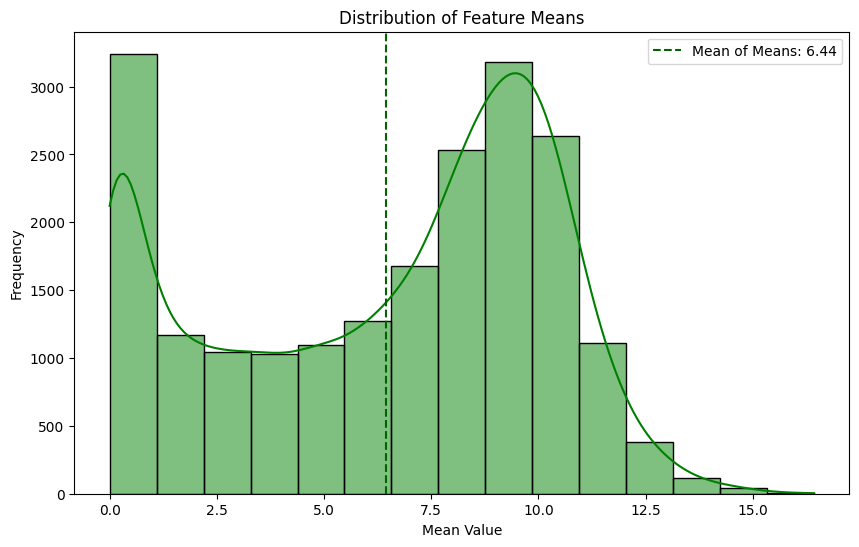

In [22]:
# Mean histogram
plt.figure(figsize=(10, 6))
sns.histplot(feature_means, kde=True, color='green', bins=15)
plt.axvline(feature_means.mean(), color='darkgreen', linestyle='--', 
            label=f'Mean of Means: {feature_means.mean():.2f}')
plt.title('Distribution of Feature Means')
plt.xlabel('Mean Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

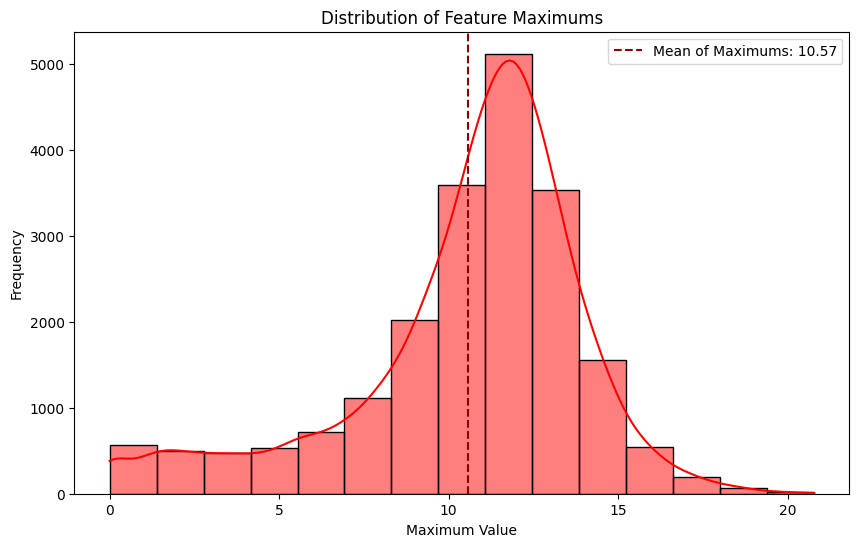

In [23]:
# Max value histogram
plt.figure(figsize=(10, 6))
sns.histplot(feature_maxs, kde=True, color='red', bins=15)
plt.axvline(feature_maxs.mean(), color='darkred', linestyle='--', 
            label=f'Mean of Maximums: {feature_maxs.mean():.2f}')
plt.title('Distribution of Feature Maximums')
plt.xlabel('Maximum Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

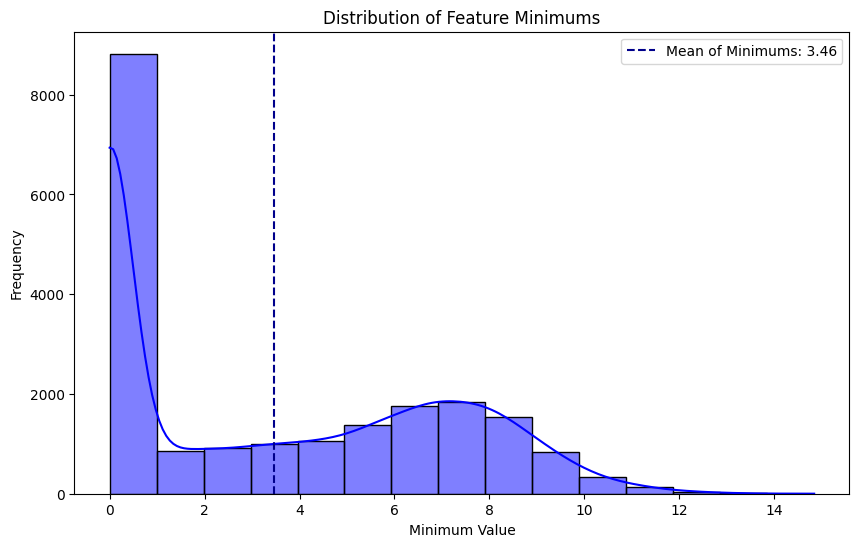

In [24]:
# Min value histogram
plt.figure(figsize=(10, 6))
sns.histplot(feature_mins, kde=True, color='blue', bins=15)
plt.axvline(feature_mins.mean(), color='darkblue', linestyle='--', 
            label=f'Mean of Minimums: {feature_mins.mean():.2f}')
plt.title('Distribution of Feature Minimums')
plt.xlabel('Minimum Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()